<a href="https://colab.research.google.com/github/Mohammadi-Nilofer/ML-assignments/blob/Ensemble-Learning/RF_WaterQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RandomForest model- Water Quality


**Context:**

This is a set of data created from imaginary data of water quality in an urban environment.

**Objective:**

To develop a robust and accurate RandomForest model that predicts the safety of water based on various water quality parameters, assisting in the identification of unsafe water sources and enabling timely interventions to protect public health.


**Data Dictionary:**

aluminium - dangerous if greater than 2.8

ammonia - dangerous if greater than 32.5

arsenic - dangerous if greater than 0.01

barium - dangerous if greater than 2

cadmium - dangerous if greater than 0.005

chloramine - dangerous if greater than 4

chromium - dangerous if greater than 0.1

copper - dangerous if greater than 1.3

flouride - dangerous if greater than 1.5

bacteria - dangerous if greater than 0

viruses - dangerous if greater than 0

lead - dangerous if greater than 0.015

nitrates - dangerous if greater than 10

nitrites - dangerous if greater than 1

mercury - dangerous if greater than 0.002

perchlorate - dangerous if greater than 56

radium - dangerous if greater than 5

selenium - dangerous if greater than 0.5

silver - dangerous if greater than 0.1

uranium - dangerous if greater than 0.3

is_safe - class attribute {0 - not safe, 1 - safe}

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the dataset
df=pd.read_csv('/content/waterQuality1.csv')

In [ ]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
df.shape

(7999, 21)

* There are 7999 rows and 21 columns in the data.

In [ ]:
# Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

**Observations:**
* The columns 'amonia' and 'is_safe' object data type, while they represents numbers.
* So, converting data types of both columns to integer.

In [ ]:
#Converting data types
df['ammonia']=df['ammonia'].astype('float')
df['is_safe']=df['is_safe'].astype('int64')

ValueError: could not convert string to float: '#NUM!'

**Observations:**
* It seems there are some string values in both the columns.

In [ ]:
# Checking for rows with string values
string_rows = df[pd.to_numeric(df['ammonia'], errors='coerce').isnull()]
print(string_rows)

      aluminium ammonia  arsenic  barium  ...  selenium  silver  uranium  is_safe
7551       0.03   #NUM!     0.08    0.79  ...      0.07    0.05     0.05    #NUM!
7568       0.06   #NUM!     0.07    1.72  ...      0.06    0.10     0.07    #NUM!
7890       0.01   #NUM!     0.08    0.49  ...      0.03    0.05     0.02    #NUM!

[3 rows x 21 columns]


**Replacing the string values with np.nan**

In [ ]:
df['ammonia'] = df['ammonia'].replace({'#NUM!': np.nan})
df['is_safe'] = df['is_safe'].replace({'#NUM!': 0})

In [ ]:
# checking if string values are converted
string_rows = df[pd.to_numeric(df['ammonia'], errors='coerce').isnull()]
print(string_rows)

      aluminium ammonia  arsenic  barium  ...  selenium  silver  uranium  is_safe
7551       0.03     NaN     0.08    0.79  ...      0.07    0.05     0.05        0
7568       0.06     NaN     0.07    1.72  ...      0.06    0.10     0.07        0
7890       0.01     NaN     0.08    0.49  ...      0.03    0.05     0.02        0

[3 rows x 21 columns]


**Now,converting the data types**

In [ ]:
df['ammonia']=df['ammonia'].astype('float')
df['is_safe']=df['is_safe'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

**Observations:**
* We can observe that data types for
 columns 'ammonia' and 'is_safe' are converted to desired data types.


 **Checking for missing values**

In [ ]:
df.isnull().sum()

,0
aluminium,0
ammonia,3
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


**Observations:**
* There are null values in the columns ammonia and is_safe.

**Null Values Imputation**

In [ ]:
df['ammonia']=df['ammonia'].fillna(df['ammonia'].mean())


In [ ]:
df.isnull().sum()

,0
aluminium,0
ammonia,0
arsenic,0
barium,0
cadmium,0
chloramine,0
chromium,0
copper,0
flouride,0
bacteria,0


**Observations:**
* Now, there are no null values in the dataset.


**Checking for duplicate values**

In [ ]:
df.duplicated().sum()

np.int64(0)

**Observations:**
There are no duplicate values.

# Summary statistics

In [ ]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.278212,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,0.114014
std,1.265145,8.877265,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,0.317848
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.580000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


**Observations:**

* Variability: Many water quality parameters (aluminium, ammonia, color, bacteria, viruses, etc.) show wide ranges and high standard deviations, indicating significant variability in the data.
* Skewness: Several parameters (aluminium, ammonia, chromium, copper, etc.) might have right-skewed distributions, meaning the tail on the right side is longer. This suggests that most values are relatively low, but there are some higher values that pull the mean upwards.
* Outliers: Potential outliers exist for several parameters (aluminium, ammonia, chromium, copper, lead, etc.), indicating values significantly higher or lower than the majority of the data. These outliers might need further investigation and potential handling.
* Central Tendency: The mean and median provide insights into typical values for each parameter. However, for skewed distributions, the median might be a more robust measure of central tendency.
*pH: The pH distribution appears to be relatively tight and centered around neutral (assuming the mean is close to 7), suggesting a generally balanced pH level in the water samples.
* Low Concentrations: Some parameters (chromium, copper, lead, mercury) are generally found in low concentrations, but potential outliers with higher values should be investigated.

In [ ]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

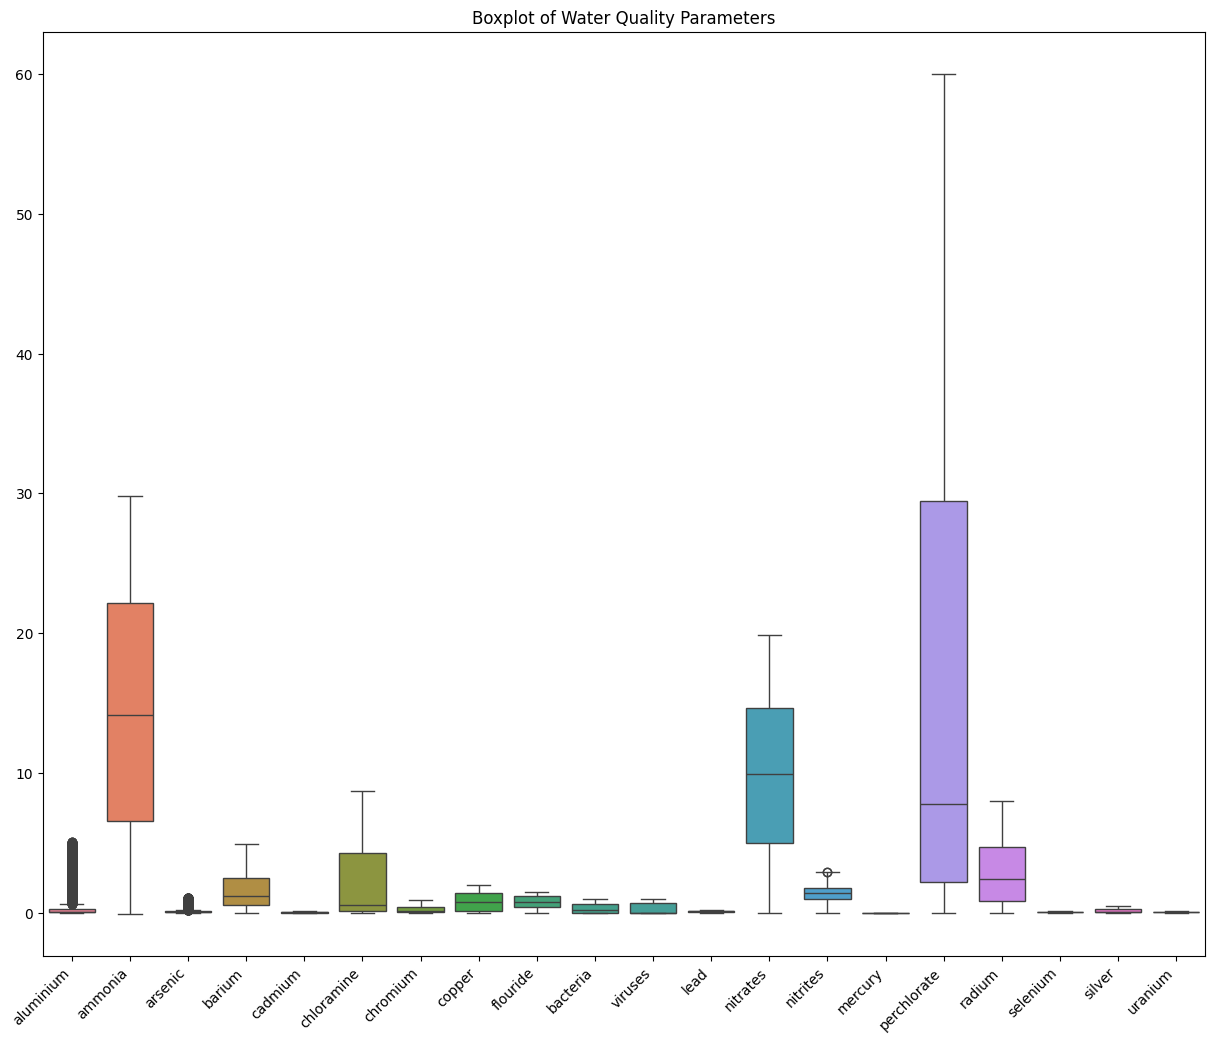

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to visualize (excluding 'is_safe' if it's categorical)
columns_to_plot = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium']

# Create the boxplot
plt.figure(figsize=(15, 12))  # Adjust figure size as needed
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Boxplot of Water Quality Parameters')
plt.show()

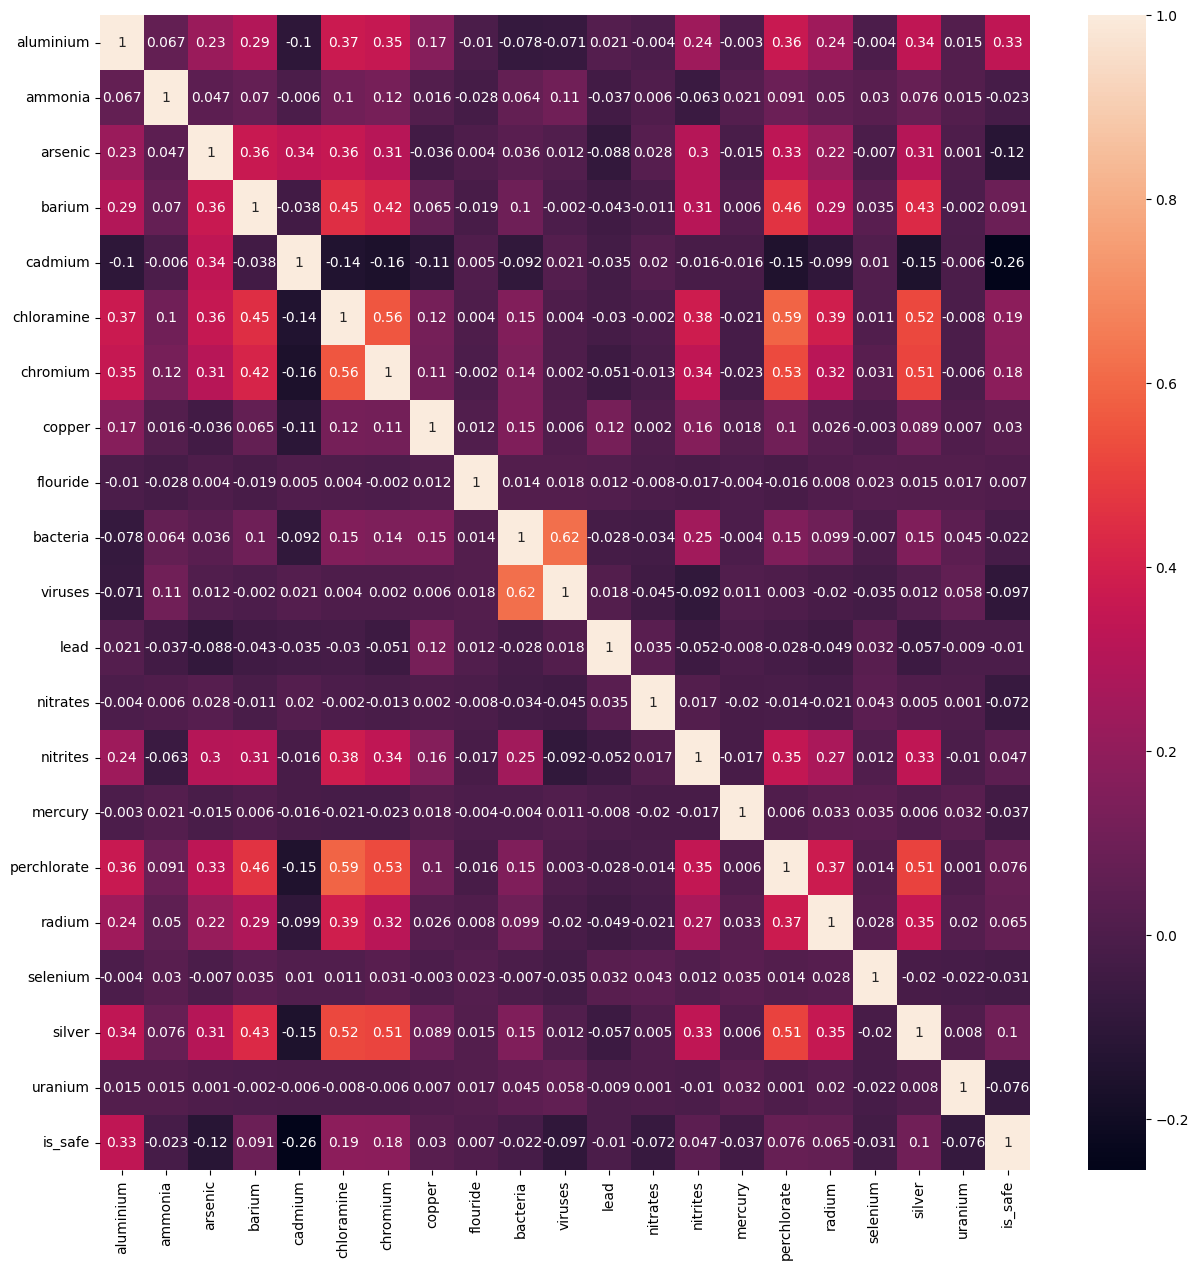

In [ ]:
# Correlation using heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(np.round(df.corr(),3),annot=True)
plt.show()

**Observations:**
* There is a positive correlation between viruses and bacteria.
* Silver is positively correlated with aluminium, arsenic, barium, nitrites, chloramine, chromium,perchlorate, and radium.
* Radium is positively correlated

# Model Building

In [ ]:
#Segregating input features and target feature
X=df.drop('is_safe',axis=1)
y=df['is_safe']

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
X

array([[ 0.77769984, -0.58560116, -0.48082883, ...,  1.05377233,
         1.33911238, -0.91713868],
       [ 1.30731642,  0.77526341, -0.59960559, ...,  1.05377233,
         0.85145064,  0.19801013],
       [ 0.27179743, -0.02908866, -0.48082883, ...,  0.70616522,
         2.03577202, -1.28885494],
       ...,
       [-0.45543727, -0.83682036, -0.63919784, ..., -1.72708457,
        -0.75086654,  0.19801013],
       [-0.51867507, -0.48195916, -0.59960559, ..., -1.72708457,
        -1.02953039, -1.66057121],
       [-0.4949609 , -0.83682036, -0.59960559, ..., -1.72708457,
        -0.75086654,  0.19801013]])

In [ ]:
#Splitting the data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6399, 20), (1600, 20), (6399,), (1600,))

In [ ]:
#Building the model
Random_Forest_Model = RandomForestClassifier(random_state=42)

In [ ]:
#Fitting the model
Random_Forest_Model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Training the data
y_train_pred=Random_Forest_Model.predict(X_train)
y_pred=Random_Forest_Model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Model Evaluation
print('Training Accuracy: ', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision: ', np.round(metrics.precision_score(y_train, y_train_pred), 2))
print('Training Recall: ', np.round(metrics.recall_score(y_train, y_train_pred), 2))
print('Training F1 Score: ', np.round(metrics.f1_score(y_train, y_train_pred), 2))

print('\nTesting Accuracy: ', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision: ', np.round(metrics.precision_score(y_test, y_pred), 2))
print('Testing Recall: ', np.round(metrics.recall_score(y_test, y_pred), 2))
print('Testing F1 Score: ', np.round(metrics.f1_score(y_test, y_pred), 2))

Training Accuracy:  1.0
Training Precision:  1.0
Training Recall:  1.0
Training F1 Score:  1.0

Testing Accuracy:  0.96
Testing Precision:  0.96
Testing Recall:  0.68
Testing F1 Score:  0.8


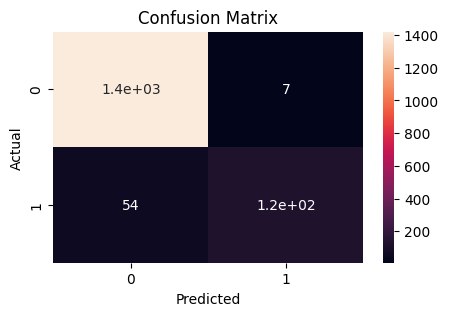

In [ ]:
# Confusion Matrix
data = pd.crosstab(y_test, y_pred)
plt.figure(figsize = (5, 3))
sns.heatmap(data, annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Generating the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1428
           1       0.94      0.69      0.79       172

    accuracy                           0.96      1600
   macro avg       0.95      0.84      0.89      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
#optimizing the model
from sklearn.model_selection import GridSearchCV


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a RandomForestClassifier object
rf_classifier = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the model with the best parameters on the test data
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best score: 0.9546811473807664
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1400
           1       0.97      0.69      0.81       200

    accuracy                           0.96      1600
   macro avg       0.97      0.85      0.89      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
 # Model Evaluation
print('Training Accuracy: ', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision: ', np.round(metrics.precision_score(y_train, y_train_pred), 2))
print('Training Recall: ', np.round(metrics.recall_score(y_train, y_train_pred), 2))
print('Training F1 Score: ', np.round(metrics.f1_score(y_train, y_train_pred), 2))

print('\nTesting Accuracy: ', np.round(metrics.accuracy_score(y_test, y_pred), 2))
print('Testing Precision: ', np.round(metrics.precision_score(y_test, y_pred), 2))
print('Testing Recall: ', np.round(metrics.recall_score(y_test, y_pred), 2))
print('Testing F1 Score: ', np.round(metrics.f1_score(y_test, y_pred), 2))

Training Accuracy:  1.0
Training Precision:  1.0
Training Recall:  1.0
Training F1 Score:  1.0

Testing Accuracy:  0.96
Testing Precision:  0.97
Testing Recall:  0.7
Testing F1 Score:  0.81


**Observations:**

* Model learns training data very well: Perfect scores on training data (accuracy, precision, recall, F1-score).
* Performance slightly lower on unseen data: Expected drop on testing data, but still good overall accuracy (0.96).
* High precision, but moderate recall: Model is good at predicting positive cases correctly (precision: 0.97), but misses some positive instances (recall: 0.7).
Room for improvement in recall and F1-score.
* Techniques like handling class imbalance, adjusting threshold, feature engineering, and hyperparameter tuning could help.
* Overall good model, but potential for enhancement: Strong performance, but consider optimization for specific needs (e.g., if identifying positive cases is crucial).